In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
image = PIL.Image.open('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg')

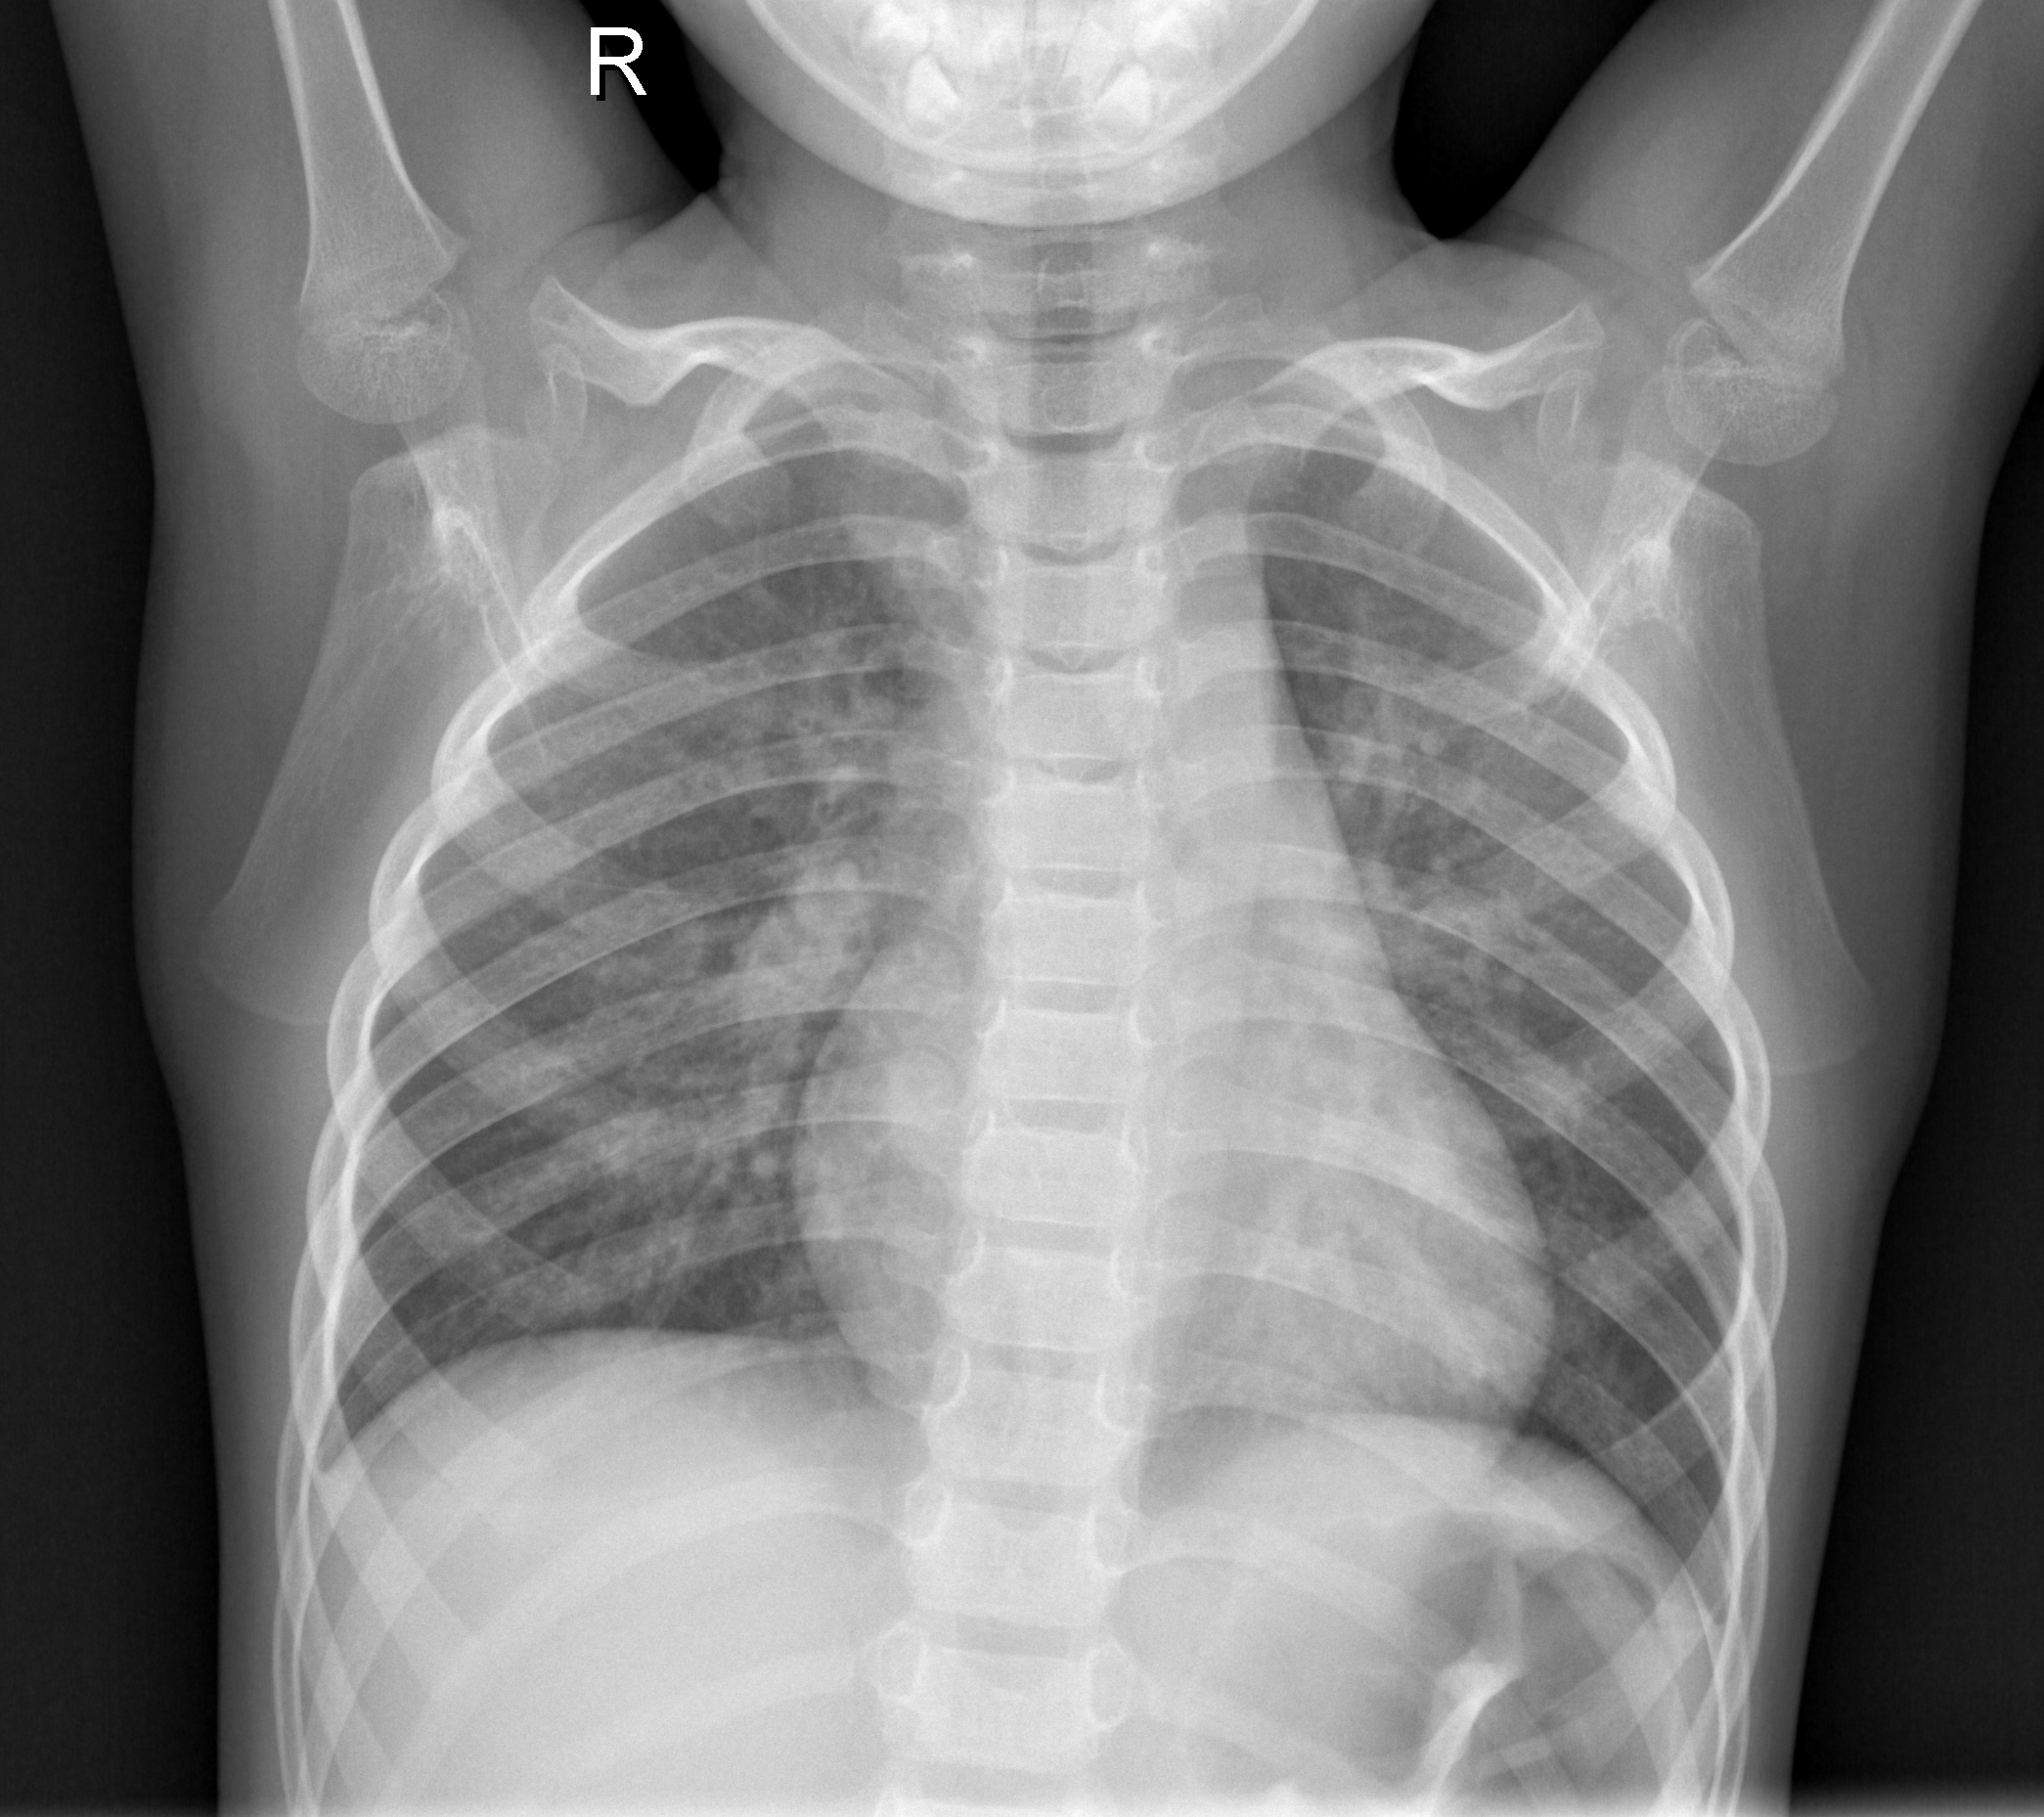

In [6]:
image

In [7]:
image_Pneu = PIL.Image.open('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1002_bacteria_2933.jpeg')

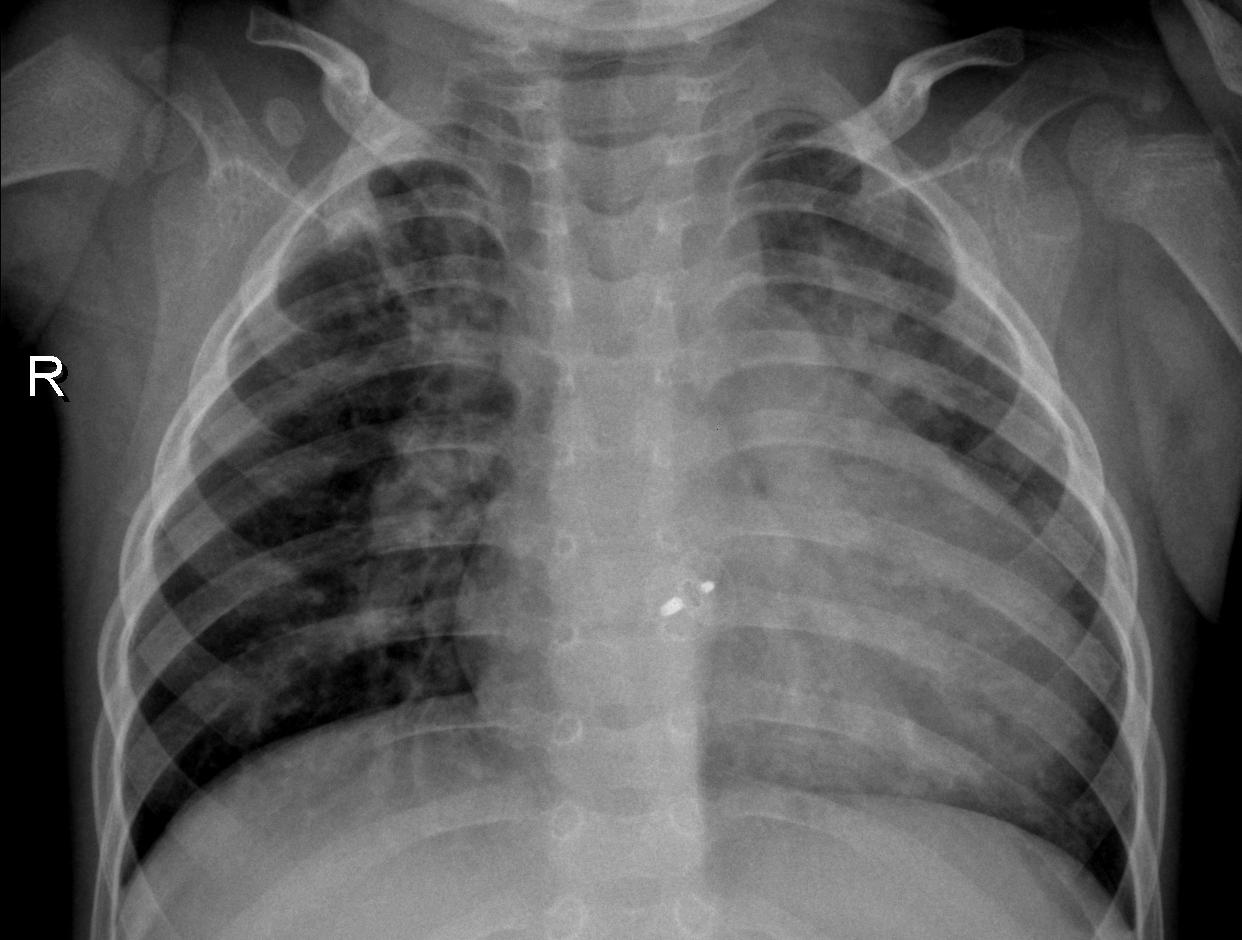

In [8]:
image_Pneu

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
training_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/'
training_generator = ImageDataGenerator(rescale = 1/255)
data_train = training_generator.flow_from_directory(training_dir,target_size=(120, 120),batch_size = 8, class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [11]:
valid_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/'
validation_generator = ImageDataGenerator(rescale = 1/255)
data_valid = validation_generator.flow_from_directory(valid_dir,target_size=(120, 120),batch_size = 8, class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [12]:
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/'
test_generator = ImageDataGenerator(rescale = 1/255)
data_test = test_generator.flow_from_directory(test_dir,target_size=(120, 120),batch_size = 8, class_mode = 'binary')

Found 624 images belonging to 2 classes.


# CNN

In [13]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),input_shape = (120,120,3),activation = 'relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(256,(3,3),activation = 'relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(512,(3,3),activation = 'relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(256,activation = 'relu'),
                            tf.keras.layers.Dense(1,activation = 'sigmoid')])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)       0

In [15]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),loss = 'binary_crossentropy',metrics = ['acc'])

In [29]:
history = model.fit_generator(data_train,epochs = 20,validation_data = data_valid)

Epoch 1/20


/tmp/ipykernel_42/1344076392.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_train,epochs = 20,validation_data = data_valid)


652/652 [==============================] - 48s 73ms/step - loss: 0.3057 - acc: 0.8723 - val_loss: 0.5993 - val_acc: 0.7500
Epoch 2/20
652/652 [==============================] - 43s 66ms/step - loss: 0.1830 - acc: 0.9281 - val_loss: 0.3231 - val_acc: 0.8750
Epoch 3/20
652/652 [==============================] - 43s 65ms/step - loss: 0.1493 - acc: 0.9436 - val_loss: 0.5504 - val_acc: 0.6875
Epoch 4/20
652/652 [==============================] - 42s 65ms/step - loss: 0.1365 - acc: 0.9471 - val_loss: 0.2137 - val_acc: 0.8750
Epoch 5/20
652/652 [==============================] - 43s 66ms/step - loss: 0.1280 - acc: 0.9505 - val_loss: 0.4039 - val_acc: 0.8125
Epoch 6/20
652/652 [==============================] - 43s 65ms/step - loss: 0.1100 - acc: 0.9605 - val_loss: 0.3725 - val_acc: 0.7500
Epoch 7/20
652/652 [==============================] - 43s 66ms/step - loss: 0.1093 - acc: 0.9588 - val_loss: 0.4185 - val_acc: 0.8125
Epoch 8/20
652/652 [==============================] - 43s 66ms/step - los

In [30]:
model.evaluate(data_test)

78/78 [==============================] - 5s 65ms/step - loss: 0.8735 - acc: 0.7917


[0.8734707236289978, 0.7916666865348816]

In [31]:
predictions = model.predict(data_test)

78/78 [==============================] - 4s 57ms/step


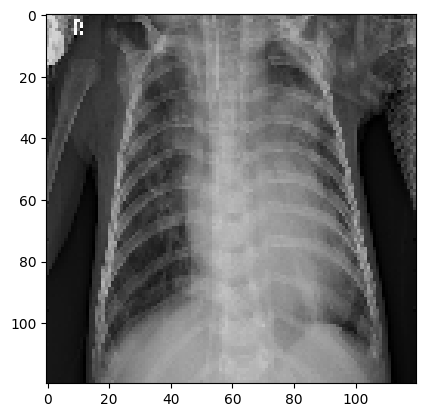

The Probability of pneumonia is: [0.99992085]


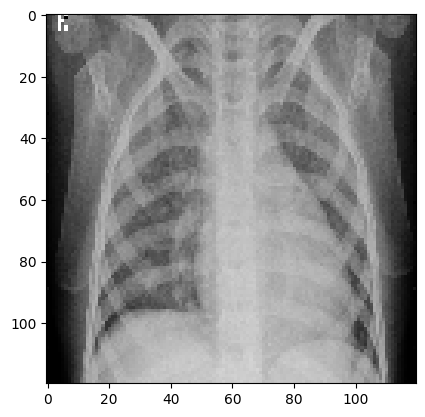

The Probability of pneumonia is: [0.80241275]


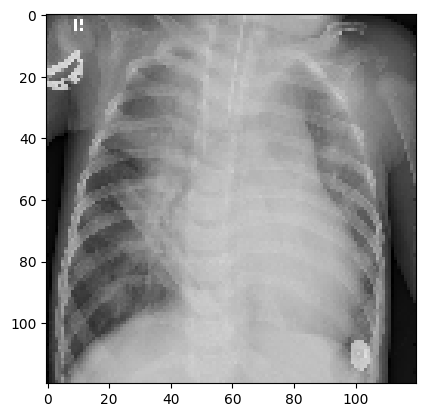

The Probability of pneumonia is: [1.]


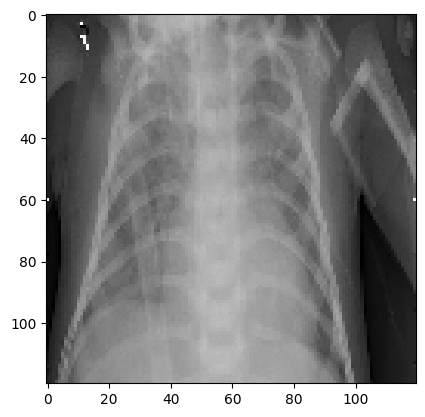

The Probability of pneumonia is: [0.99999344]


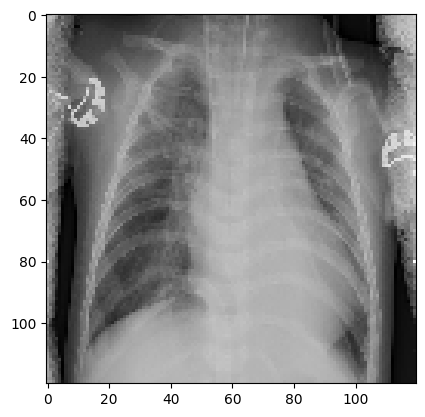

The Probability of pneumonia is: [0.9999994]


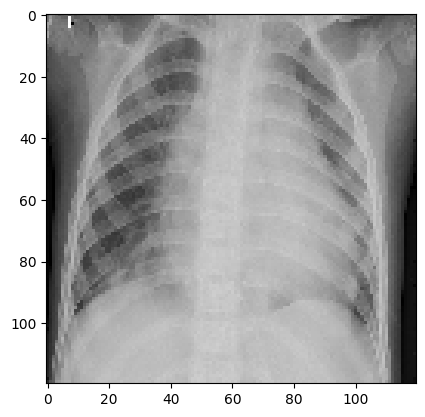

The Probability of pneumonia is: [2.6354624e-05]


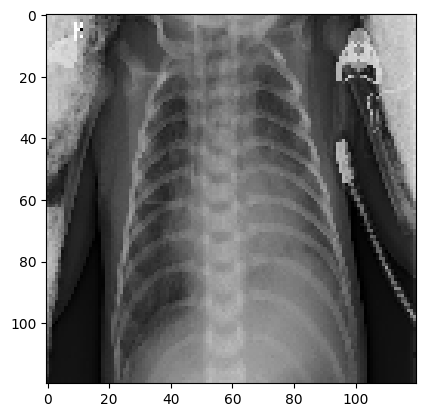

The Probability of pneumonia is: [0.99525034]


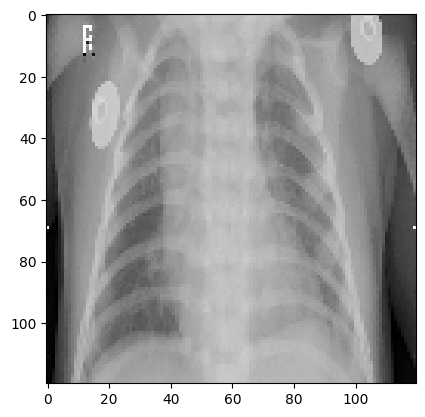

The Probability of pneumonia is: [0.9429176]


In [32]:
x = data_test.next()
for i in range(0,1):
    image = x[i]
    for j in range(0,8):
        plt.imshow(image[j])
        plt.show()
        print('The Probability of pneumonia is:',predictions[j])

In [41]:
import cv2
img= cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg')
tempimg = img
img = cv2.resize(img,(120,120))
img = img/255.0
img = img.reshape(1,120,120,3)

1/1 [==============================] - 0s 19ms/step
Prediction: Normal


Text(0.5, 1.0, 'Prediction: Normal')

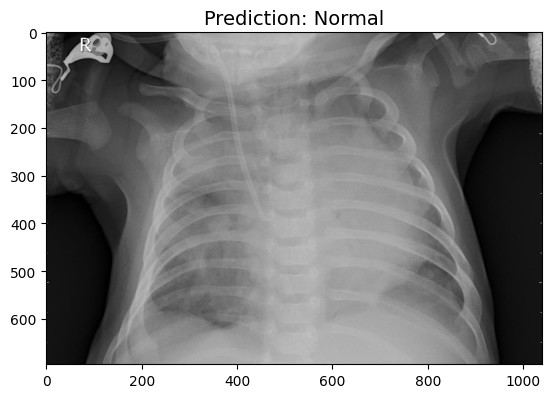

In [42]:
prediction = model.predict(img) >= 0.5
if prediction >=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

In [43]:
model.save("trained.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
from keras.models import load_model
model = load_model("trained.h5")

In [48]:
import cv2
img= cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0009-0001.jpeg')
tempimg = img
img = cv2.resize(img,(120,120))
img = img/255.0
img = img.reshape(1,120,120,3)

1/1 [==============================] - 0s 18ms/step
Prediction: Normal


Text(0.5, 1.0, 'Prediction: Normal')

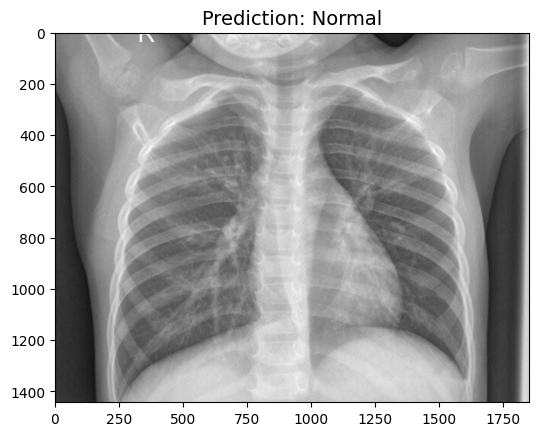

In [49]:
prediction = model.predict(img) >= 0.5
if prediction >=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)